In [54]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
samp = np.loadtxt('170170.txt', usecols=4)
MIN=samp.min();MAX=samp.max();MEAN=samp.mean();STD=samp.std();VAR=samp.var()
MIN,MAX,MEAN,STD,VAR

(1527.85, 6831.3, 2471.2782, 1061.9694483659878, 1127779.1092627603)

In [77]:
param = stats.gumbel_r.fit(samp) # distribution fitting

x = np.linspace(MIN,MAX,1000) # fitted distribution
pdf_fitted = stats.gumbel_r.pdf(x, *param)

In [78]:
param

(2068.1790735292243, 592.7318227690419)

Power_divergenceResult(statistic=11.165073142166705, pvalue=0.08340667876054962)
12.505242537591698


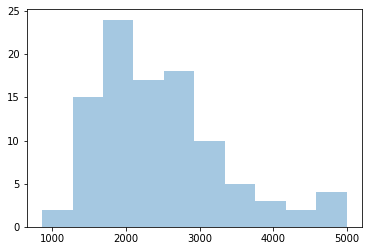

In [58]:
# chi-square
counts, edges, plot = plt.hist(samp,bins=10,alpha=0.4)

summ = 0
for i in range(0,10):
    upper_cdf = stats.gumbel_r.cdf(edges[i+1], *param)
    lower_cdf = stats.gumbel_r.cdf(edges[i], *param)
    summ += (counts[i]**2/(100*(upper_cdf-lower_cdf)))
chi_statistic = summ - 100

exp_counts = np.array([])
for i in range(0,10):
    upper_cdf = stats.gumbel_r.cdf(edges[i+1], *param)
    lower_cdf = stats.gumbel_r.cdf(edges[i], *param)
    exp_counts = np.append(exp_counts, 100 * (upper_cdf - lower_cdf))
print(stats.chisquare(counts,exp_counts,ddof=3))
print(chi_statistic)

In [59]:
stats.kstest(samp,'gumbel_r',args = (param[0],param[1]))

KstestResult(statistic=0.06957712862881837, pvalue=0.7259066901763589)

In [60]:
stats.anderson(samp, 'gumbel_r')

AndersonResult(statistic=0.3296715806778536, critical_values=array([0.465, 0.625, 0.742, 0.86 , 1.018]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ]))

(array([4.84265019e-05, 3.63198764e-04, 5.81118023e-04, 4.11625266e-04,
        4.35838517e-04, 2.42132509e-04, 1.21066255e-04, 7.26397528e-05,
        4.84265019e-05, 9.68530038e-05]),
 array([ 862.08 , 1275.077, 1688.074, 2101.071, 2514.068, 2927.065,
        3340.062, 3753.059, 4166.056, 4579.053, 4992.05 ]),
 <a list of 10 Patch objects>)

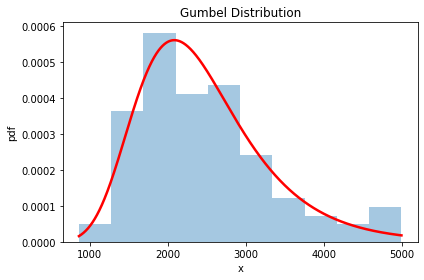

In [61]:
fig,axes = plt.subplots()

axes.plot(x,pdf_fitted,'r',lw=2.5)
axes.set_xlabel('x')
axes.set_ylabel('pdf')
axes.set_title('Gumbel Distribution')
fig.tight_layout()

plt.hist(samp,alpha=0.4,density=True)

In [53]:
k = 2
logLik = np.sum(stats.gumbel_r.logpdf(samp, *param)) 
aic = 2*k - 2*(logLik)
aic

1617.8911248368731

In [63]:
dis = stats.gumbel_r.ppf(0.98,*param)
dis

4642.701546200449